# (06) DOVES—LapConv—1

**Motivation**: Laplace + DOVES + Conv encoder. ```prior_fit = False```. Device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

model_type = 'laplace'

## Archi: ```<Conv|Lin>```

In [3]:
cfg_vae, cfg_tr = default_configs('DOVES', model_type, 'conv+b|lin')

print(f"VAE:\n{cfg_vae}\n\nTrainer:\n{cfg_tr}")

VAE:
{'dataset': 'DOVES', 'n_ch': 32, 'n_latents': 512, 'latent_act': None, 'fit_prior': False, 'enc_type': 'conv', 
'dec_type': 'lin', 'enc_bias': True, 'dec_bias': False}

Trainer:
{'temp_anneal_portion': 1.0, 'temp_anneal_type': 'exp', 'temp_start': 1.0, 'temp_stop': 1.0, 'lr': 0.005, 
'batch_size': 1000, 'epochs': 3000, 'optimizer_kws': {'weight_decay': 0.0}, 'grad_clip': 500}

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  LaplaceVAE |  1.5 Mil   |
|     ---     |    ---     |
|     stem    |    352     |
|     enc     |  1.2 Mil   |
|    fc_enc   |  132.1 K   |
|    fc_dec   |  131.1 K   |
+-------------+------------+

laplace_None_DOVES_z-512_k-32_<conv+b|lin>
mc_b1000-ep3000-lr(0.005)_beta(1:0x0.5)_temp(1:exp-1)_gr(500)_(2024_05_06,11:22)

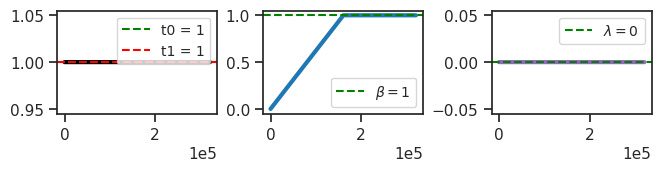

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [5]:
print(vae)

LaplaceVAE(
  (mse): MSELoss()
  (stem): Conv2D(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc): Sequential(
    (0): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=32, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=32, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (1): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(32, 16, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (2): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (3): Cell(
      (skip): FactorizedReduce(
        (swish): SiLU()
        (ops): ModuleList(
          (0-3): 4 x Conv2D(64, 32, kernel_size=(1, 1), stride=(2, 2))
        )
      )
      (ops): ModuleList(
        (0): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        )
        (1): ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (4): Cell(
      (skip): Identity()
      (ops): ModuleList(
        (0-1): 2 x ConvLayer(
          (act_fn): SiLU()
          (conv): Conv2D(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (se): SELayer(
        (fc): Sequential(
          (0): Linear(in_features=128, out_features=8, bias=True)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=8, out_features=128, bias=True)
          (3): Sigmoid()
        )
      )
    )
    (5): ResConvPool(
      (act_fn): SiLU()
      (pool): AdaptiveAvgPool2d(output_size=(1, 1))
      (conv): Conv2D(128, 128, kernel_size=(4, 4), stride=(1, 1), padding=valid)
    )
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): ResDenseLayer(
      (fc1): Linear(in_features=128, out_features=1024, bias=True)
      (fc2): Linear(in_features=1024, out_features=128, bias=True)
      (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (drop): Dropout(p=0.1, inplace=False)
      (relu): ReLU()
    )
  )
  (fc_enc): Linear(in_features=128, out_features=1024, bias=True)
  (fc_dec): Linear(in_features=512, out_features=256, bias=False)
)

In [6]:
vae.fc_dec.bias, vae.fc_enc.bias.shape

(None, torch.Size([1024]))

In [7]:
vars(tr.cfg)

{'lr': 0.005,
 'epochs': 3000,
 'batch_size': 1000,
 'warm_restart': 0,
 'warmup_epochs': 5,
 'optimizer': 'adamax_fast',
 'optimizer_kws': {'weight_decay': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-08},
 'scheduler_type': 'cosine',
 'scheduler_kws': {'T_max': 2995.0, 'eta_min': 1e-05},
 'ema_rate': 0.999,
 'grad_clip': 500,
 'chkpt_freq': 50,
 'eval_freq': 20,
 'log_freq': 10,
 'use_amp': False,
 'method': 'mc',
 'kl_beta': 1.0,
 'kl_beta_min': 0.0001,
 'kl_anneal_cycles': 0,
 'kl_anneal_portion': 0.5,
 'kl_const_portion': 0.0001,
 'lambda_anneal': False,
 'lambda_init': 0.0,
 'lambda_norm': 0.0,
 'temp_anneal_portion': 1.0,
 'temp_anneal_type': 'exp',
 'temp_start': 1.0,
 'temp_stop': 1.0}

In [8]:
vars(vae.cfg)

{'latent_act': None,
 'fit_prior': False,
 'type': 'laplace',
 'enc_type': 'conv',
 'dec_type': 'lin',
 'enc_bias': True,
 'dec_bias': False,
 'dataset': 'DOVES',
 'input_sz': 16,
 'n_ch': 32,
 'n_latents': 512,
 'weight_norm': False,
 'use_bn': False,
 'use_se': True,
 'res_eps': 1.0,
 'activation_fn': 'swish',
 'init_scale': 0.05,
 'seed': 0,
 'base_dir': '/home/hadi/Projects/PoissonVAE',
 'results_dir': '/home/hadi/Projects/PoissonVAE/results',
 'runs_dir': '/home/hadi/Projects/PoissonVAE/runs/laplace_None_DOVES_z-512_k-32_<conv+b|lin>',
 'save_dir': '/home/hadi/Projects/PoissonVAE/models/laplace_None_DOVES_z-512_k-32_<conv+b|lin>',
 'data_dir': '/home/hadi/Datasets'}

### Train

In [9]:
# comment = f"..._{tr.cfg.name()}"
comment = tr.cfg.name()
tr.train(comment=comment)

epoch # 3000, avg loss: 159.246443: 100%|█████████████████████| 3000/3000 [2:40:03<00:00,  3.20s/it]


### Loss vld (freeze)

In [10]:
data, loss, etc = tr.validate()

_loss = {k: v.mean() for k, v in loss.items()}
_loss['tot'] = _loss['mse'] + _loss['kl']
print(_loss)

{'mse': 107.50143, 'kl': 51.745865, 'kl_diag': 0.10056799, 'tot': 159.24728}

In [10]:
### Was: categorical with prior fit

{'mse': 165.39445, 'kl': 5.4255557, 'kl_diag': 5.414346, 'tot': 170.82}

In [26]:
### Was: fixed prior

{'mse': 165.01498, 'kl': 5.632016, 'kl_diag': 5.6216135, 'tot': 170.647}

{'mse': 134.10709, 'kl': 28.86082, 'kl_diag': 0.056184433, 'tot': 162.96791}

{'mse': 133.72597, 'kl': 28.916742, 'kl_diag': 0.05594784, 'tot': 162.64272}

{'mse': 132.80032, 'kl': 29.794188, 'kl_diag': 0.05768895, 'tot': 162.59451}

### Plot enc/dec weights

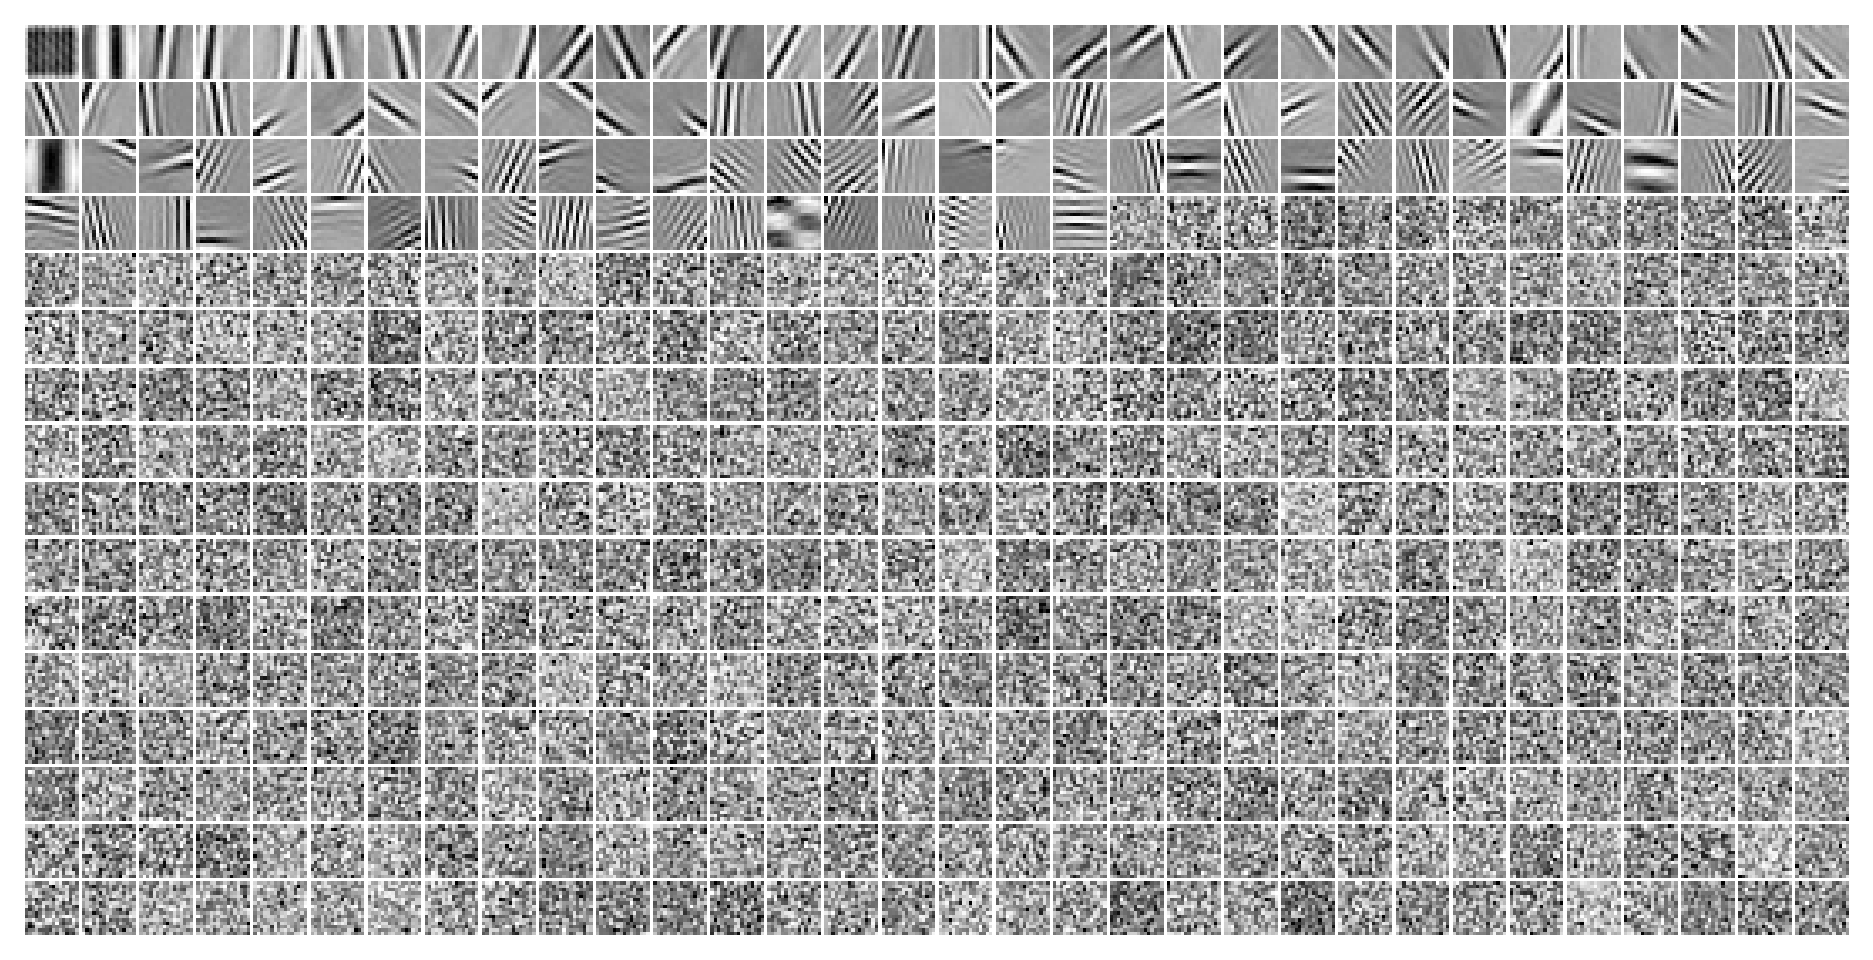

In [12]:
vae.show(dpi=250, order=np.argsort(flatten_np(etc['scale'], start_dim=1).mean(0)));

### Some more distributions

In [13]:
tr.model.temp, tr.cfg.kl_beta

(tensor(1., device='cuda:1'), 1.0)

In [14]:
from figures.imgs import plot_weights

In [27]:
dead_thres = 0.1

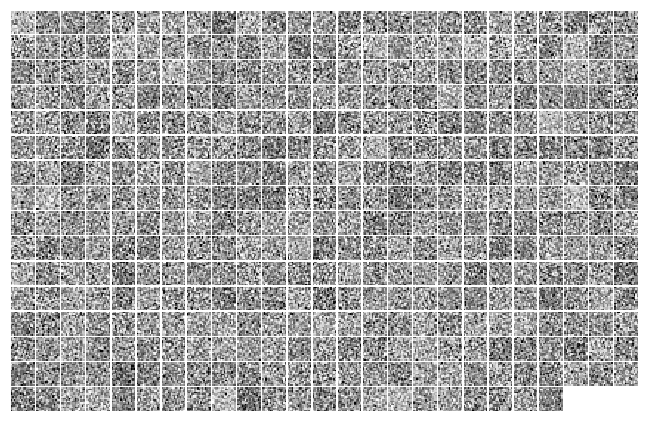

In [31]:
try:
    ind = np.where(loss['kl_diag'] < dead_thres)[0]
    plot_weights(vae.fc_dec.weight.data.T.reshape(-1, 16, 16)[ind], nrows=16, dpi=110);
except ValueError:
    pass

In [34]:
try:
    ind = np.where(tonp(vae.log_scale.squeeze()) > 1)[0]
    plot_weights(vae.fc_dec.weight.data.T.reshape(-1, 16, 16)[ind], nrows=1, dpi=15);
except ValueError:
    pass

## Loggabor analysis

In [35]:
dead_thres = 0.1
dead = loss['kl_diag'] < dead_thres

In [36]:
from analysis.loggabor import fit_loggabor
from figures.theta import plot_theta
from figures.imgs import plot_weights

In [37]:
results = fit_loggabor(tr, verbose=True)

  1%|▏            | 5/512 [00:00<01:13,  6.86it/s]

  2%|▏           | 10/512 [00:01<00:57,  8.79it/s]

  4%|▍           | 19/512 [00:02<00:43, 11.42it/s]

 15%|█▊          | 79/512 [00:09<01:29,  4.86it/s]

 18%|██▏         | 93/512 [00:11<00:41, 10.19it/s]

 25%|██▊        | 129/512 [00:14<00:35, 10.84it/s]

 28%|███        | 141/512 [00:15<00:35, 10.54it/s]

 35%|███▊       | 178/512 [00:20<00:28, 11.62it/s]

 38%|████▏      | 192/512 [00:22<00:31, 10.31it/s]

 40%|████▍      | 204/512 [00:23<00:23, 13.10it/s]

 45%|████▉      | 230/512 [00:28<00:33,  8.53it/s]

 54%|█████▉     | 276/512 [00:34<00:36,  6.54it/s]

 57%|██████▏    | 290/512 [00:36<00:31,  7.13it/s]

 66%|███████▎   | 338/512 [00:43<00:16, 10.69it/s]

 68%|███████▌   | 350/512 [00:45<00:17,  9.28it/s]

 72%|███████▉   | 367/512 [00:46<00:13, 10.57it/s]

 73%|████████   | 373/512 [00:47<00:14,  9.39it/s]

 75%|████████▎  | 384/512 [00:49<00:13,  9.29it/s]

 83%|█████████  | 423/512 [00:53<00:05, 16.39it/s]

 85%|█████████▎ | 435/512 [00:54<00:07, 10.77it/s]

 90%|█████████▉ | 460/512 [00:56<00:03, 14.83it/s]

 93%|██████████▏| 474/512 [00:58<00:03, 10.69it/s]

 97%|██████████▋| 498/512 [01:01<00:01, 10.74it/s]

100%|███████████| 512/512 [01:02<00:00,  8.14it/s]


In [38]:
results.loc[results['sf_0'] > 10, 'sf_0'] = np.nan
results.iloc[np.logical_or(dead, np.isnan(results['theta']))] = np.nan
results.describe()

,x_pos,y_pos,theta,sf_0,phase,B_sf,B_theta,theta_deg
count,112.000000,112.000000,112.000000,111.000000,112.000000,112.000000,112.000000,112.000000
mean,7.576624,7.520762,0.075245,0.267130,-0.090468,0.306083,0.152625,92.704093
std,3.103337,3.835051,0.985911,0.164632,1.968233,0.155649,0.082584,47.721445
min,0.956590,0.616708,-1.439728,0.087253,-4.379917,0.071941,0.054842,1.281575
25%,5.892202,4.095720,-0.828471,0.204554,-1.743194,0.188599,0.096098,55.588699
50%,7.424652,7.684122,0.031089,0.242803,-0.199481,0.321673,0.141206,90.000000
75%,9.486565,10.953579,0.974381,0.311597,1.587155,0.379043,0.182146,128.126940
max,14.229959,15.319922,1.570796,1.807161,4.928485,1.213809,0.706720,179.661655


In [40]:
rates_axial = results.loc[(results['label'] == 'axial') & ~dead, 'phase'].values
rates_oblique = results.loc[(results['label'] == 'oblique') & ~dead, 'phase'].values

print(f"{sp_stats.mannwhitneyu(rates_axial, rates_oblique, method='auto')}")

MannwhitneyuResult(statistic=1919.0, pvalue=0.04106576785804638)

In [41]:
a, b = len(rates_axial), len(rates_oblique)
a / (a+b), b / (a+b)

(0.49107142857142855, 0.5089285714285714)

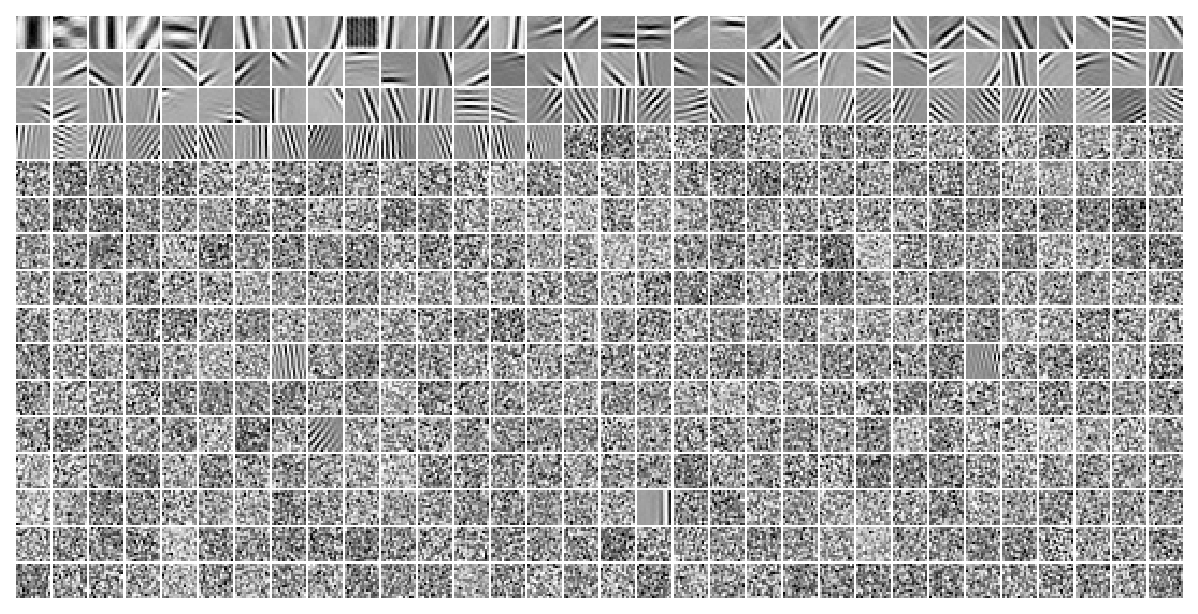

In [42]:
order = np.argsort(results['sf_0'].values)
_ = tr.model.show(order=order)

In [43]:
w_dec = tonp(tr.model.fc_dec.weight.data)
w_dec = w_dec.T.reshape(-1, 16, 16)
ids = np.argsort(results['sf_0'].values)

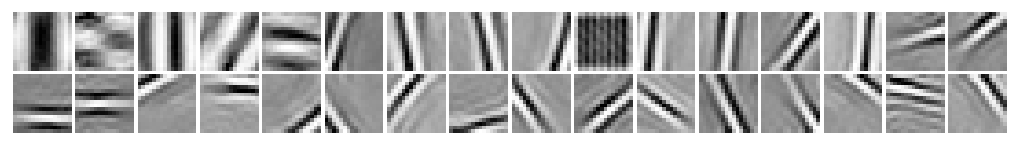

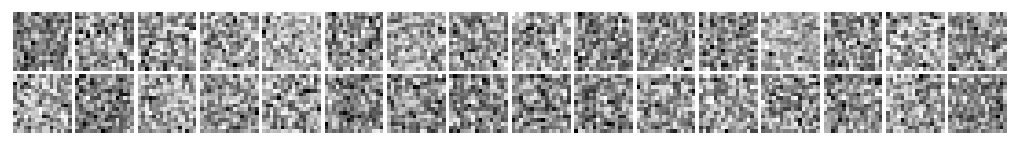

In [44]:
plot_weights(w_dec[ids[:32]], nrows=2, dpi=130)
plt.show()

plot_weights(w_dec[ids[-32:]], nrows=2, dpi=130)
plt.show()